# Neural Network in Go
## Introduction
In this module, we will learn about

* Neural Network Basics
* Forward Propagation
* Function Optimization
* Backward Propagation
* Loading CSV files using Go
* Golang matrix library `Gonum`

Before we start writing a feed forward fully connected neural network in Go, we must go over the basics and mathematical formulation in order to understand what the hell is going on.

## Basics
What is a neural network? I believe you have seen a picture like this before.

![neural_net](neural_net.png)

A neural network takes some inputs and spits out an output. Essentially, a neural network is a mathematical function that takes an input and creates an output, given a set of parameters (we called them weights.)

$$
f_{W}(\vec{x}) = \vec{y}
$$

For example, if we have a linear function:

$$
f_{W}(x) = W_{1}x + W_{0}
$$

This is equivalent to the equation of a line we learn in high school

$$
y = mx + b
$$ 

#### If it's just a line, then what's the fuss?!
It's actually more than a line, once you include nonlinearity activation. However, before we get to that part. Let's talk about what if `x` is a vector of inputs, i.e. `x` is a high dimensional input. How do you construct a line in higher dimensional space?

### Affine Transformation
When `x` is a vector of inputs:

$$
\vec{x} = x_{0}, x_{1}, x_{2}, x_{3}, ..., x_{N}
$$

We wish to apply a linear mapping to it, i.e. saying we want to take the inputs and use them as linear combinations to produce a set of outputs. In this case, we need to use matrices.

$$
\begin{vmatrix}
x_{0} & x_{1} & x_{2}
\end{vmatrix}
\times
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2}
\end{vmatrix}
$$

We denote the weight matrix with a single letter $W$ and the input vector with a single letter $X$, and above equation is said to be applying a $W$ transformation on $X$. This is called *affine transformation*.

Let's look at an example in Python below:

In [1]:
import numpy as np

# We have an input, 1, 2, 3
x = np.array([1, 2, 3])

# We have a weight matrix
W = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

# We perform matrix multiplication and get an output 
y = np.dot(x, W)

print y 

[6 6 6]


### Non-linear Activation
We need to make our high dimensional line flexible, the ability to curve and create non-linear mapping. The choice of activation we will use for this exercise is *sigmoid activation*

$$
\sigma(\vec{x}) = \frac{1}{1 + e^{-\vec{x}}}
$$

There are many other activation functions you can choose from, e.g. `tanh`, `ReLU`, `leaky ReLU`, `exponential` and the list goes on. For now, let's just focus on one.

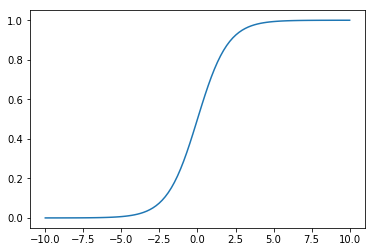

In [2]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-1 * x))


x = np.linspace(-10, 10, num=100)
plt.plot(x, sigmoid(x))
plt.show()

## How do they fit together?
Now you are probably like, "okay, so we began with a line, then x was originally a single value, then it became multi-dimensional input, then we talked about some matrix multiplications and sigmoid function. At this moment, you are most likely feeling:

![sowhat](sowhat.gif)


Let's head over to [TensorFlow Playground](http://playground.tensorflow.org)

## Forward Propagation

Let's imagine that we have a neural network with NO hidden layer. Let's say our input is an array of four elements, they represent `height`, `weight`, `fur_length`, and `fat ratio` of a dog. The output of the neural network would be a dog breed classification based on your input. For sake of simplicity, let's assume that there are only 3 breeds in the provided data.

Input:
$$
\vec{x} = [x_{0}, x_{1}, x_{2}, x_{3}]
$$

Weights:
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2}
\end{vmatrix}
$$

The input is of shape `(1, 4)` and the weight matrix is of shape `(4, 3)`. The matrix product of them is of shape `(1, 3)`, which represent the score for each classification. 

$$
y_{score} = [y_{0}, y_{1}, y_{2}]
$$

In [3]:
# Let's say you have multiple dog inputs, cause you want to do a batch of classification
dog_input_1 = [20, 10, 4, 0.90] # Completely bullshit data
dog_input_2 = [21, 5, 3, 0.50]

inputs = np.array([dog_input_1, dog_input_2])

print inputs.shape

W = np.random.randn(4, 3)

print W.shape

output = np.dot(inputs, W)
act = sigmoid(output)

print act

(2, 4)
(4, 3)
[[1.00000000e+00 1.64981851e-11 9.99999516e-01]
 [1.00000000e+00 1.29586829e-11 9.99737159e-01]]


Let's get fancy and do multiple hidden layers; let's try two!

Input:
$$
\vec{x} = [x_{0}, x_{1}, x_{2}, x_{3}]
$$

First weight matrix is of shape `(4, 4)` 
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} & w_{0, 3} \\
w_{1,0} & w_{1, 1} & w_{1, 2} & w_{1, 3} \\
w_{2,0} & w_{2, 1} & w_{2, 2} & w_{2, 3} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2} & w_{3, 3}
\end{vmatrix}
$$

Second weight matrix is of shape `(4, 3)`
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2} \\ 
w_{3,0} & w_{3, 1} & w_{3, 2}
\end{vmatrix}
$$

Third weight matrix is of shape `(3, 3)`
$$
\begin{vmatrix}
w_{0,0} & w_{0, 1} & w_{0, 2} \\
w_{1,0} & w_{1, 1} & w_{1, 2} \\
w_{2,0} & w_{2, 1} & w_{2, 2}
\end{vmatrix}
$$





In [4]:
W1 = np.random.randn(4, 4)
W2 = np.random.randn(4, 3)
W3 = np.random.randn(3, 3)

layer_1_output = np.dot(inputs, W1)
layer_1_act = sigmoid(layer_1_output)

print "Layer 1 output has shape %s" % str(layer_1_act.shape)

layer_2_output = np.dot(layer_1_act, W2)
layer_2_act = sigmoid(layer_2_output)

print "Layer 2 output has shape %s" % str(layer_2_act.shape)

layer_3_output = np.dot(layer_2_act, W3)
layer_3_act = sigmoid(layer_3_output)

print "Layer 3 output has shape %s" % str(layer_3_act.shape)

print "Final output:"
print layer_3_act

Layer 1 output has shape (2, 4)
Layer 2 output has shape (2, 3)
Layer 3 output has shape (2, 3)
Final output:
[[0.78145756 0.63716317 0.52505252]
 [0.78141881 0.63718789 0.5250318 ]]


## Function Optimization
Now you know how to use a neural network to produce output but the output is crap; it does not produce meaningful and intelligent result. The next question is how to make your neural network *smart*, in other words, how to train it with data.

We need to know about what is function optimization.

### Linear Regression
If you are given a set of data points with x and y coordinates, how do you fit a line that best represents the pattern you are seeing your data?

$$
\vec{x} = [x_{0}, x_{1}, x_{2}, ..., x_{N}]
$$

$$
\vec{y} = [y_{0}, y_{1}, y_{2}, ..., y_{N}]
$$

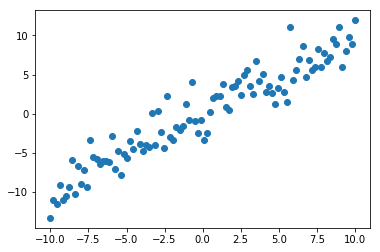

In [5]:
x = np.linspace(-10, 10, num=100)
y = np.linspace(-10, 10, num=100) + np.random.randn(100,) * 2

plt.plot(x, y, 'o')
plt.show()

In the example above, we can clearly see a trend in the data. Let's assume a linear model that will fit a line to this dataset.

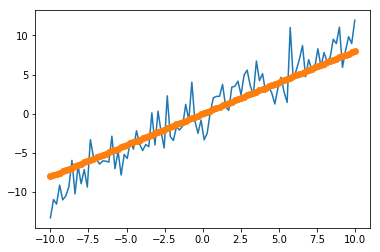

In [6]:
def linear_model(m, b, x):
    return m * x + b

w0 = 0
w1 = 0.8

plt.plot(x, y, x, linear_model(w1, w0, x), 'o')
plt.show()

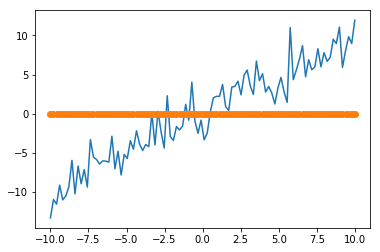

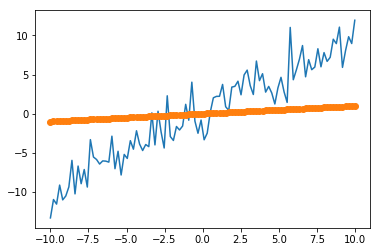

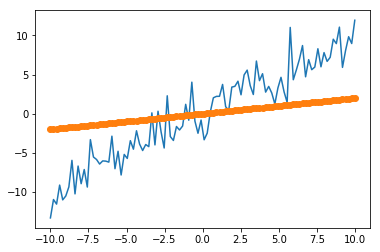

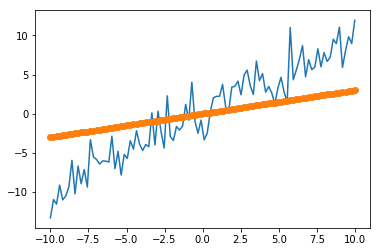

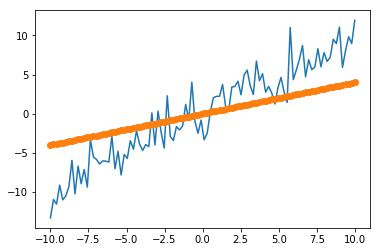

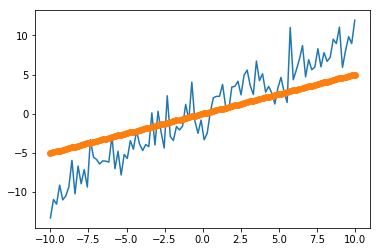

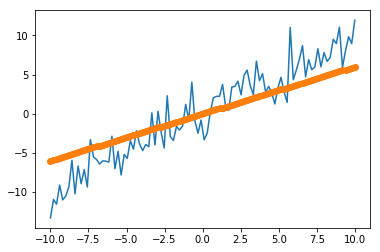

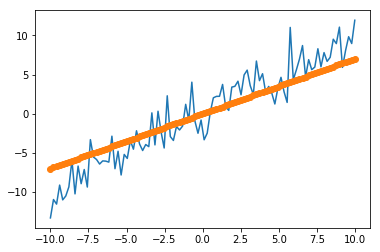

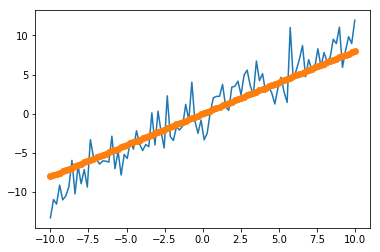

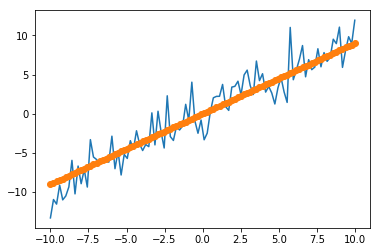

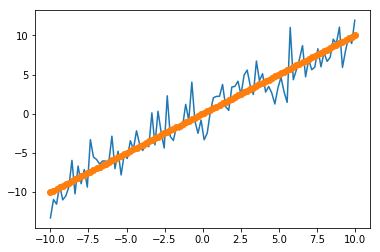

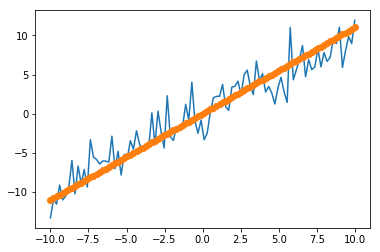

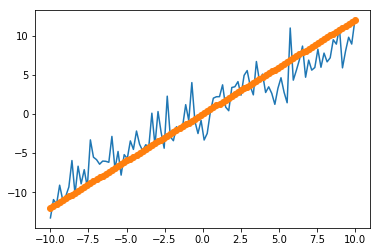

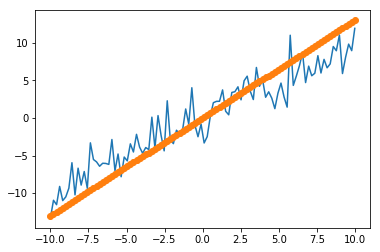

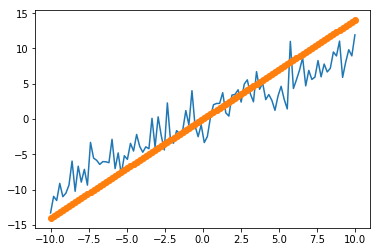

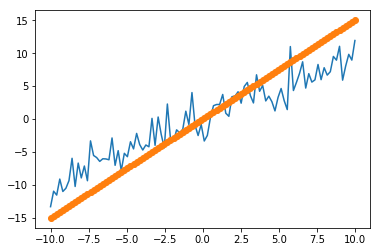

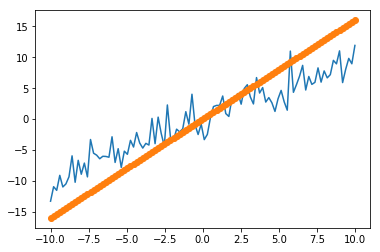

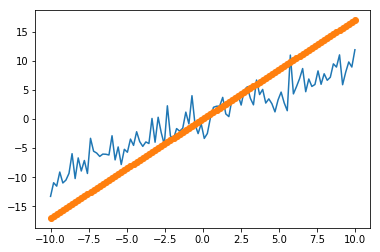

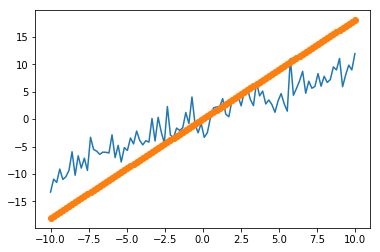

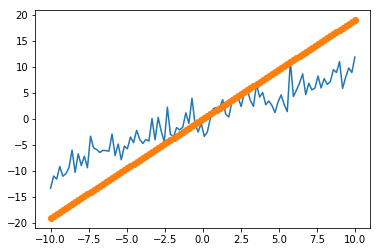

In [7]:
w1 = 0
while w1 < 2:
    plt.plot(x, y, x, linear_model(w1, w0, x), 'o')
    plt.show()
    w1 += 0.1

### Find the best fit
How to find the best fit without bunch of random guesses? Let's define what it means to have a best fit line first.

$$
Error = L = \frac{1}{2}\Sigma_{i = 0}^{i = N} (y_{i} - \hat{y}_{i})^{2}
$$

The *y hat* is the prediction from our linear model, while $y_{i}$ is the actual data point from our data set. The error is a measurement of how closely our model resembles reality. If our model is off by a lot, the error is a big number. If our model has perfect prediction, then we should expect an error of 0. This error formulation is known as the **L2 Loss Function**.

Now we know how to measure the fitness of a model. The next is to learn how to use this measurement to find the best fit.

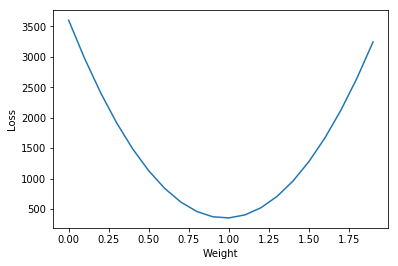

In [17]:
def loss(x, y, y_pred):
    diff = y - y_pred
    return (diff * diff).sum(axis=0)

losses = []
weights = []
w0, w1 = 0, 0
while w1 < 2:
    weights.append(w1)
    losses.append(loss(x, y, linear_model(w1, w0, x)))
    w1 += 0.1
    
plt.plot(weights, losses)
plt.ylabel("Loss")
plt.xlabel("Weight")
plt.show()

Loss function is parabolic and where do you think the minimum is? It looks like around $W = 1$ right? What would be a more systematic approach that will lead us to the answer?

## Derivatives
Imagine you start on a random point of this curve (graph above), how do know you whether you should increase or decrease $w_{1}$ to get to a lower loss value, i.e. reducing error in your model. You can look at the slope of whichever point you are at. Moving along the **opposite** direction of your slope will always lead to a lower point in the function.

Let's imagine your $w_{1}$ is 0. You look at your slope, it has a negative value. You move your $w_{1}$ along the positive direction, i.e. increasing your $w_{1}$ such that you are moving from left to right on the x-axis. Similarly if your $w_{1}$ starts at 1.75, you look at your slope and realize that it is a positive slope. You move your $w_{1}$ along the negative direction, i.e. decreasing your $w_{1}$ such that you are moving from right to left on the x-axis. 

Recall linear model is defined as follows:

$$
\hat{y} = w_{1}x + w_{0}
$$

The L2 loss function is defined as follows:

$$
L = (\hat{y} - y)^{2}
$$

The slope of the loss function with respect to $w_{1}$ is:

$$
\frac{\partial L}{\partial w_{1}} = (w_{1}x + w_{0} - y) \cdot x
$$

The slope of the loss function with respect to $w_{0}$ is:

$$
\frac{\partial L}{\partial w_{1}} = (w_{1}x + w_{0} - y)
$$


In higher dimensional examples, the slope is also known as a gradient.

In [70]:
w0, w1 = 0, 0.1
step_size = 1e-5
total_steps = 100

# Perform update on w1 only
for step in range(total_steps):
    grad_w1 = ((w1*x + w0 - y) * x).sum()
    w1 = w1 - (step_size * grad_w1)
    print loss(x, y, linear_model(w1, w0, x))
    
print "The value for w0 is %f" % w0
print "The value for w1 is %f" % w1

2795.4549967385237
2632.0495699255657
2479.5689413761916
2337.2827117430375
2204.509313995249
2080.612748635809
1964.9995371924676
1857.1158793891614
1756.4450003804523
1662.5046753419406
1574.8449195591613
1493.045832950228
1416.715588697252
1345.488556351849
1279.0235504241973
1217.0021960662007
1159.1274040201822
1105.1219475279543
1054.7271343834873
1007.7015677681735
963.819989932933
922.8722031882817
884.6620630337745
849.0065386038057
815.734835929191
784.687579814862
755.7160504147697
728.6814708471072
703.4543424374504
679.9138244055538
657.9471550244309
637.4491114790115
618.3215058370293
600.4727147177942
583.817240405899
568.2753013075561
553.7724497877957
540.2392155579275
527.6107729050517
515.8266301696063
504.83033998352204
494.56922888098364
484.99414498661014
476.05922257244646
467.7216623559731
459.9415264867322
452.6815472395355
445.9069484978726
439.5852791724039
433.6862577565969
428.18162727490494
423.04501992868035
418.25183079145415
413.7790999485743
409.605402

In [72]:
w0, w1 = 0, 0.1
step_size = 1e-5
total_steps = 200

# Perform update on w1 AND w0
for step in range(total_steps):
    grad_w0 = (w1*x + w0 - y).sum()
    grad_w1 = ((w1*x + w0 - y) * x).sum()
    w0 = w0 - (step_size * grad_w0)
    w1 = w1 - (step_size * grad_w1)
    print loss(x, y, linear_model(w1, w0, x))
    
print "The value for w0 is %f" % w0
print "The value for w1 is %f" % w1

2795.454974984612
2632.049526461228
2479.5688762448276
2337.2826249879586
2204.509205659682
2080.612618762893
1964.9993858252553
1857.1157065706197
1756.4448061534627
1662.5044597492993
1574.8446826435777
1493.0455747543267
1416.7153092635726
1345.488255722845
1279.023228642239
1217.0018531735725
1159.1270400590843
1105.1215625405025
1054.7267284117138
1007.7011408540255
963.8195421182744
922.8717345148925
884.6615735433514
849.0060283379621
815.7343049294568
784.6870281226844
755.7154780715128
728.6808778940524
703.4537289157972
679.9131903564182
657.9465004888476
637.4484364979328
618.3208104513259
600.4719989682548
583.816504333231
568.2745449523854
553.7716731906671
540.2384187593045
527.6099559453171
515.8257930890622
504.82948282239
494.5683516794048
484.9932477846453
476.0583054100764
467.7207252730987
459.9405695231744
452.6805704350359
445.90595189209324
439.5842628049277
433.6852216669272
428.18057150246665
423.0439445128191
418.25073577143735
413.7779853635905
409.6042684057

Notice that the best fit parameters have come out to be 0 for $w_{0}$ and 1 for $w_{1}$, which makes perfect sense because when I generated the data. I basically did $y = x$ with some random noise on the y-data. The best fit model should be a straight line that starts from `(0, 0)` with a slope of 1. 

## Backward Propagation